# Libraries

In [ ]:
import torch
import os
import glob
from IPython.display import Image, display


print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


In [ ]:
!git clone https://github.com/Nebezao1/1234.git

Cloning into '1234'...
remote: Enumerating objects: 7112, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 7112 (delta 0), reused 2 (delta 0), pack-reused 7109
Receiving objects: 100% (7112/7112), 804.56 MiB | 17.04 MiB/s, done.
Resolving deltas: 100% (191/191), done.
Updating files: 100% (7368/7368), done.


In [ ]:
cd 1234

/content/1234


In [ ]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...
remote: Enumerating objects: 15656, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 15656 (delta 137), reused 175 (delta 98), pack-reused 15393
Receiving objects: 100% (15656/15656), 14.65 MiB | 19.38 MiB/s, done.
Resolving deltas: 100% (10665/10665), done.


In [ ]:
cd yolov5

/content/1234/yolov5


In [ ]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00


# Train YOLOv5 model

In [ ]:
!python train.py --img 640 --batch 16 --epochs 4 --data ../fire_config.yaml --weights yolov5s.pt --workers 1

train: weights=yolov5s.pt, cfg=, data=../fire_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

In [ ]:
from utils.plots import plot_results
plot_results('runs/train/exp/results.csv')

### Prediction on Images

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../datasets/fire/val/images/

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/fire/val/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/150 /content/1234/datasets/fire/val/images/0.jpg: 480x640 1 fire, 46.9ms
image 2/150 /content/1234/datasets/fire/val/images/0016f8c09384627e.jpg: 480x640 2 fires, 9.0ms
image 3/150 /content/1234/datasets/fire/val/images/004dec94c5de631f.jpg: 480x640 1 fire, 8.9ms
image 4/150 /content/1234/datasets/fire/val/images/00c3cfc7c51ff6

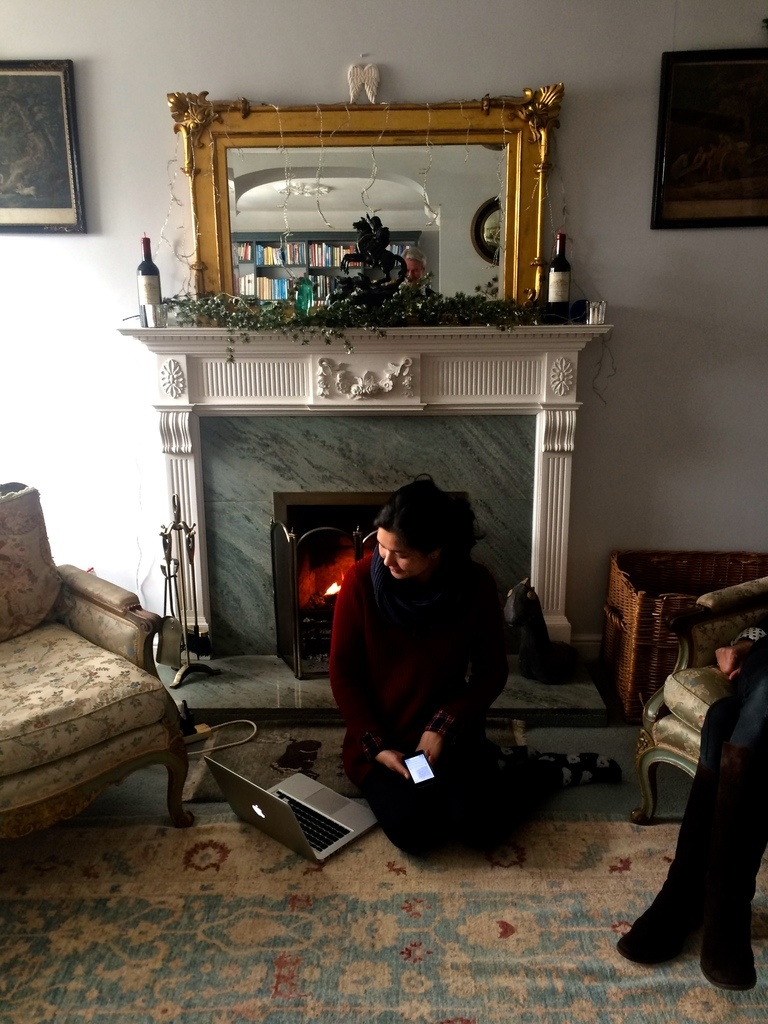

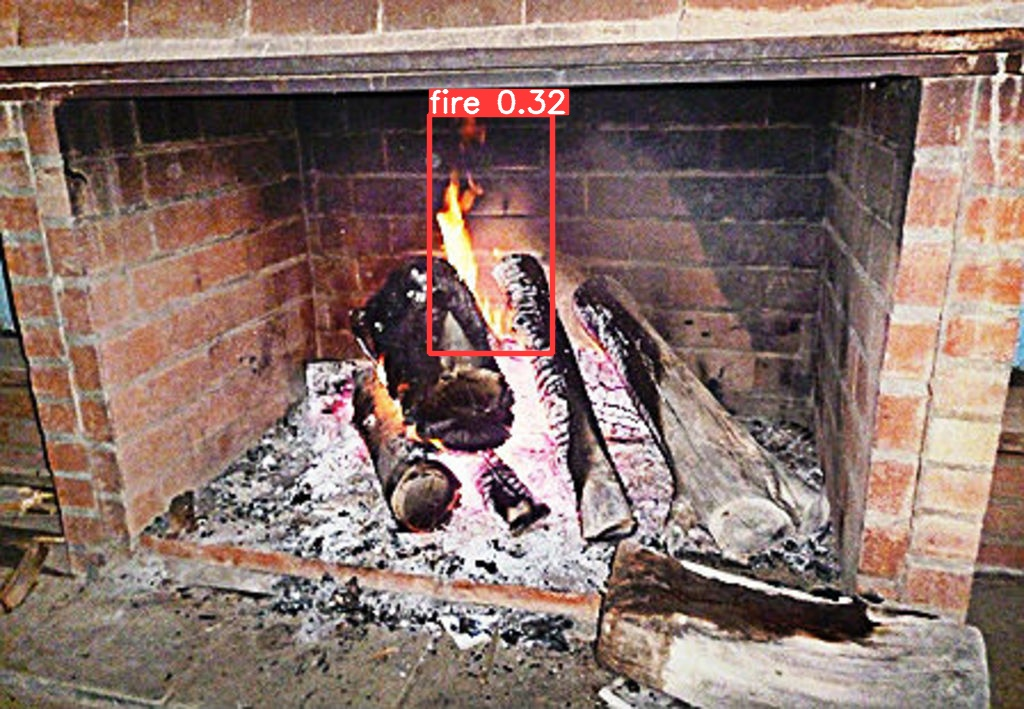

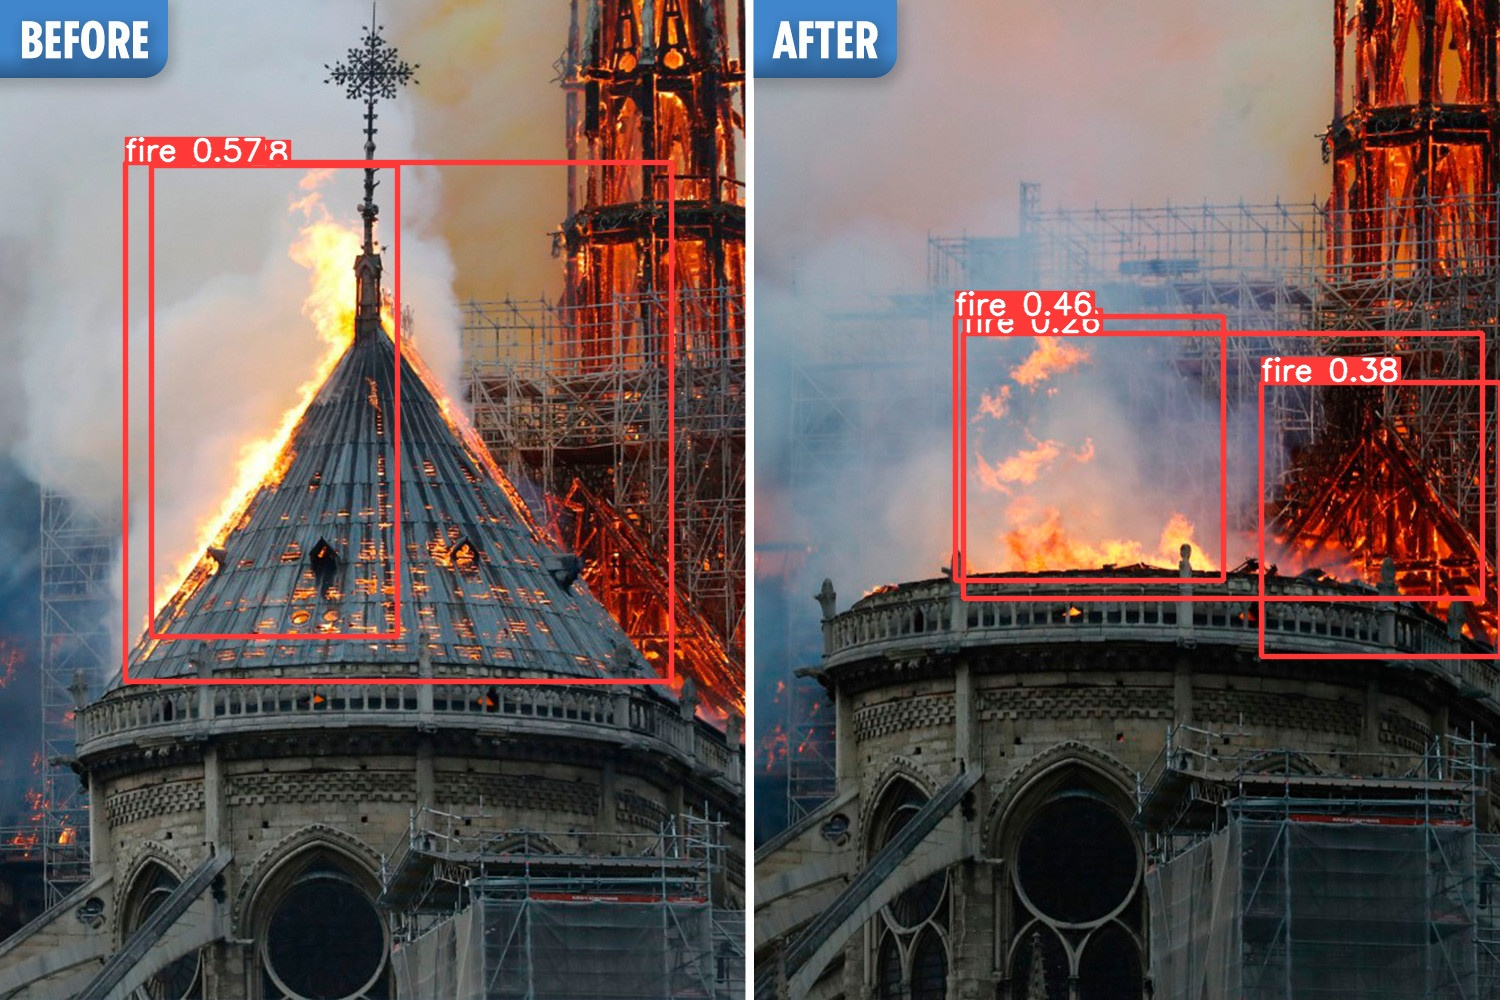

In [ ]:
#display inference on some test images
images = glob.glob('runs/detect/exp/*.jpg')

for imageName in images[:3]: #assuming JPG
    display(Image(filename=imageName, width=500))

### Prediction on Video 

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../input.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=../input.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/446) /content/1234/input.mp4: 384x640 1 fire, 41.4ms
video 1/1 (2/446) /content/1234/input.mp4: 384x640 1 fire, 7.9ms
video 1/1 (3/446) /content/1234/input.mp4: 384x640 1 fire, 7.9ms
video 1/1 (4/446) /content/1234/input.mp4: 384x640 1 fire, 7.8ms
video 1/1 (5/446) /content/1234/input.mp4: 384x640 1 fire, 7.9ms
video 1/1 (6/446) /content/

In [ ]:
import cv2
vidcap = cv2.VideoCapture('runs/detect/exp2/input.mp4')
success,image = vidcap.read()
images = []
while success:
    success,image = vidcap.read()
    if success:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

In [ ]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt

rc('animation', html='jshtml')

def create_animation(ims):
    fig = plt.figure(figsize=(9, 9))
    plt.axis('off')
    im = plt.imshow(ims[0])

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames = len(ims), interval = 1000//12)

create_animation(images)

# Visualize feature map

In [ ]:
image_path = "../datasets/fire/val/images/004dec94c5de631f.jpg"
display(Image(filename=image_path, width=400))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source {image_path} --visualize

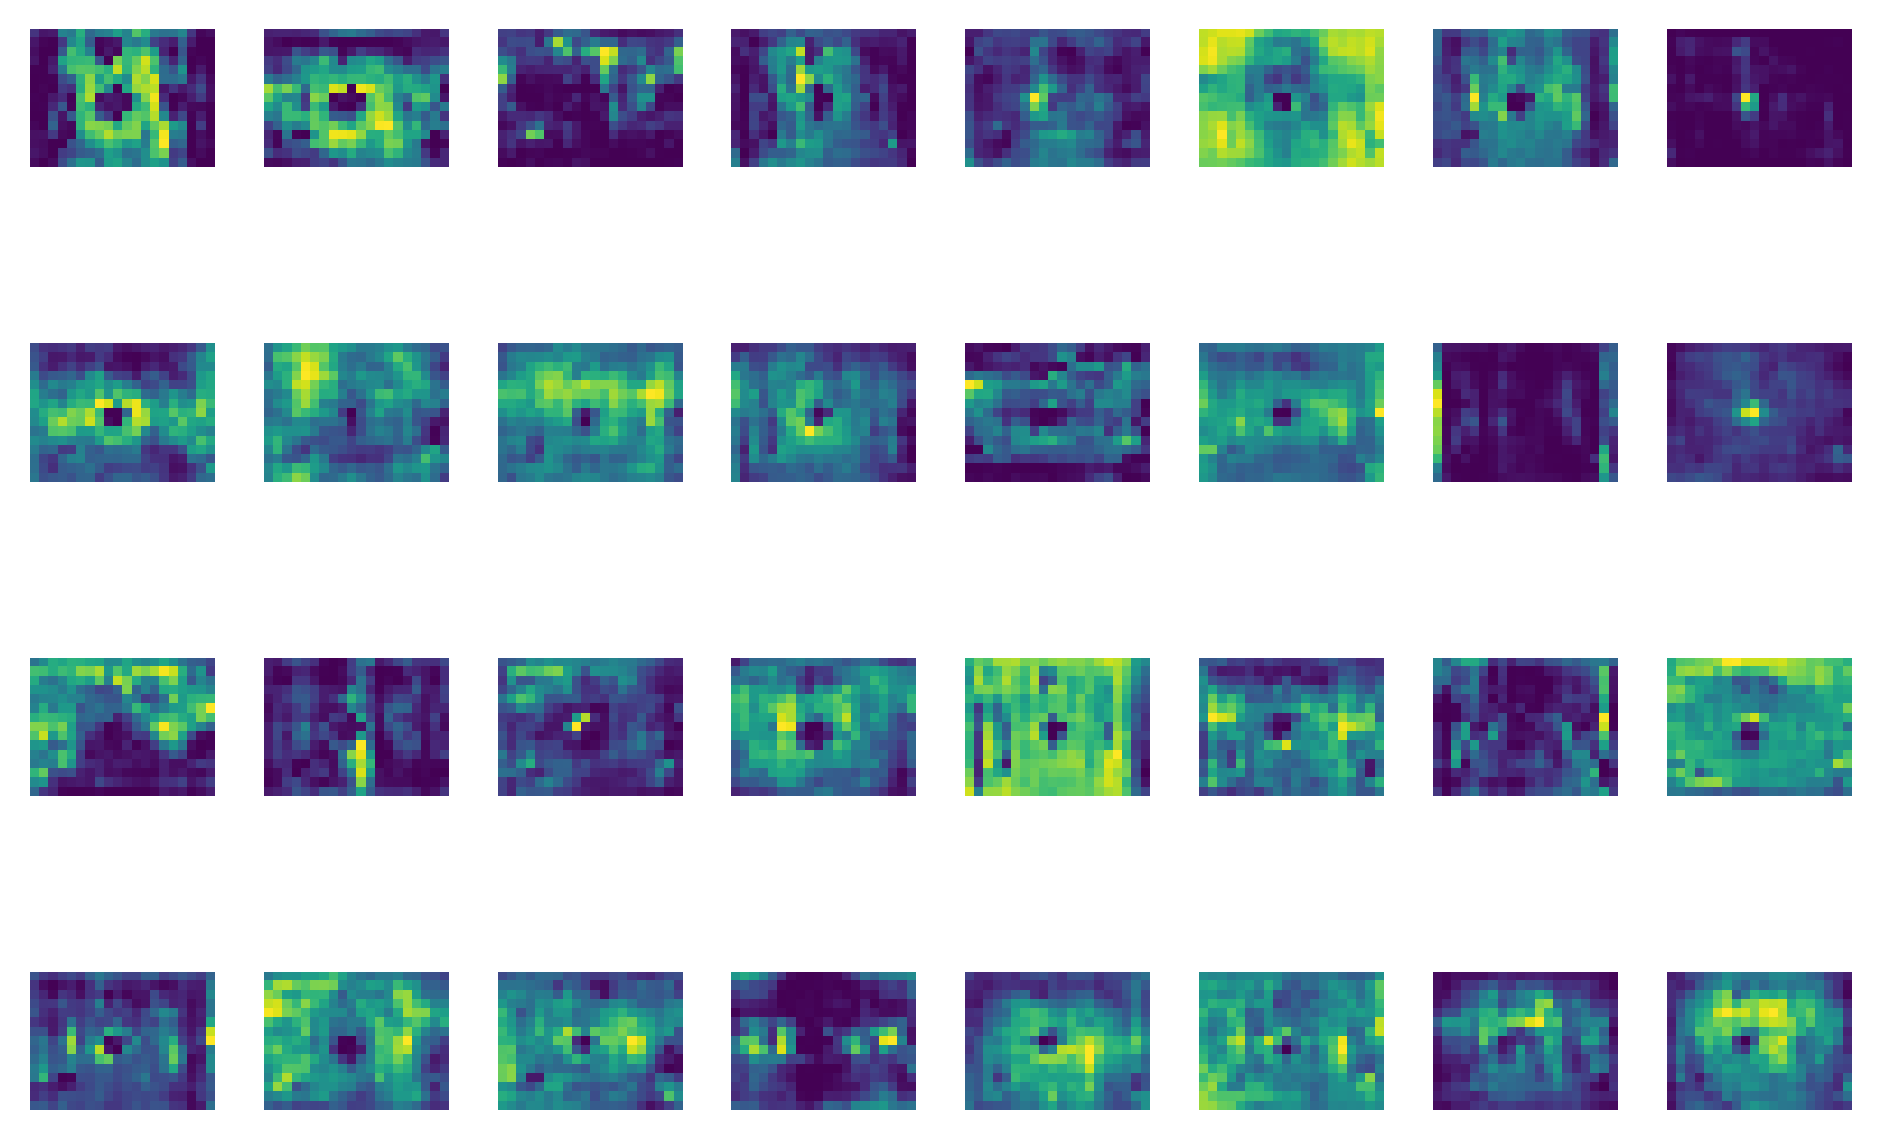

In [ ]:
display(Image(filename="runs/detect/exp3/004dec94c5de631f/stage23_C3_features.png"))